In [2]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
my_key = "04a0f2c511ae63fee5e2b5da9e60417e"

## 1. 地理/逆地理编码
思考：地理编码是将已知的地址描述到对应的经纬度的转换过程，逆地理编码则是反过来。我觉得用到了计算机视觉功能。

In [87]:
# 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = "https://restapi.amap.com/v3/geocode/geo?parameters"
    params = {
        "key":my_key,
        "address":address,
        "city":city,
        "batch":batch,
        "sig":sig,
        "output":"json"
    }   
    response = requests.get(url,params=params)
    data = response.json()
    return data

# 获取南京大学地理编码
南京大学 = geocode(address="江苏省南京市南京大学")   # 提供地址，开始查询该地址的地理编码
# print(南京大学)
南京大学地理编码 = json_normalize(南京大学['geocodes'])  # 生成表格
display(南京大学地理编码)
南京大学地理编码 = 南京大学['geocodes'][0]['location']   # 获取地理编码
print("南京大学地理编码:",南京大学地理编码)

# 获取东南大学地理编码
东南大学 = geocode(address="江苏省南京市东南大学")
# print(东南大学)
东南大学地理编码 = json_normalize(东南大学['geocodes'])
display(东南大学地理编码)
东南大学地理编码 = 东南大学['geocodes'][0]['location']
print("东南大学地理编码:",东南大学地理编码)


,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,320113,[],[],南京市,025,中国,栖霞区,江苏省南京市栖霞区南京大学,兴趣点,"118.961365,32.110012",[],[],[],江苏省,[],[]


南京大学地理编码: 118.961365,32.110012


,adcode,building.name,building.type,city,citycode,country,district,formatted_address,level,location,neighborhood.name,neighborhood.type,number,province,street,township
0,320102,[],[],南京市,025,中国,玄武区,江苏省南京市玄武区东南大学,兴趣点,"118.798150,32.046546",[],[],[],江苏省,[],[]


东南大学地理编码: 118.798150,32.046546


In [89]:
# 逆地理编码
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取地理编码"""
    url = "https://restapi.amap.com/v3/geocode/regeo?parameters"
    params = {
        "key":my_key,
        "location":location,
        "poitype":poitype,
        "radius":radius,
        "extensions":extensions,
        "batch":batch,
        "roadlevel":roadlevel,
        "sig":sig,
        "homeorcorp":homeorcorp,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

南京大学_逆 = regeocode(南京大学地理编码)   # 传入地理编码，搜索该地址的准确位置以及周边信息
print(南京大学_逆)
南京大学逆地理编码 = json_normalize(南京大学_逆).T
display(南京大学逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '南京市', 'province': '江苏省', 'adcode': '320113', 'district': '栖霞区', 'towncode': '320113007000', 'streetNumber': {'number': '172号', 'location': '118.960112,32.110045', 'direction': '西', 'distance': '118.082', 'street': '仙林大道'}, 'country': '中国', 'township': '仙林街道', 'businessAreas': [{'location': '118.924463,32.107446', 'name': '仙林', 'id': '320113'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '025'}, 'formatted_address': '江苏省南京市栖霞区仙林街道中大路南京大学仙林校区'}, 'info': 'OK', 'infocode': '10000'}


,0
info,OK
infocode,10000
regeocode.addressComponent.adcode,320113
regeocode.addressComponent.building.name,[]
regeocode.addressComponent.building.type,[]
regeocode.addressComponent.businessAreas,"[{'location': '118.924463,32.107446', 'name': ..."
regeocode.addressComponent.city,南京市
regeocode.addressComponent.citycode,025
regeocode.addressComponent.country,中国
regeocode.addressComponent.district,栖霞区


In [90]:
# 全部逆地理编码解析
南京大学逆地理编码_all = regeocode(南京大学地理编码,extensions="all")
print(南京大学逆地理编码_all)
df_南京大学逆地理编码_all = json_normalize(南京大学逆地理编码_all).T
display(df_南京大学逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '025I50F047040601502', 'location': '118.961,32.11', 'direction': '东', 'name': '中大路', 'distance': '20.9097'}, {'id': '025I50F047040210', 'location': '118.961,32.1094', 'direction': '北', 'name': '仙林大道', 'distance': '69.2327'}, {'id': '025I50F0470406882', 'location': '118.961,32.1099', 'direction': '东', 'name': '金大路', 'distance': '75.2638'}], 'roadinters': [{'second_name': '中大路', 'first_id': '025I50F047040210', 'second_id': '025I50F047040601502', 'location': '118.9612764,32.10939389', 'distance': '69.2327', 'first_name': '仙林大道', 'direction': '北'}], 'formatted_address': '江苏省南京市栖霞区仙林街道中大路南京大学仙林校区', 'addressComponent': {'city': '南京市', 'province': '江苏省', 'adcode': '320113', 'district': '栖霞区', 'towncode': '320113007000', 'streetNumber': {'number': '172号', 'location': '118.960112,32.110045', 'direction': '西', 'distance': '118.082', 'street': '仙林大道'}, 'country': '中国', 'township': '仙林街道', 'businessAreas': [{'location': '118.924463,32.107446', 'name':

,0
info,OK
infocode,10000
regeocode.addressComponent.adcode,320113
regeocode.addressComponent.building.name,[]
regeocode.addressComponent.building.type,[]
regeocode.addressComponent.businessAreas,"[{'location': '118.924463,32.107446', 'name': ..."
regeocode.addressComponent.city,南京市
regeocode.addressComponent.citycode,025
regeocode.addressComponent.country,中国
regeocode.addressComponent.district,栖霞区


In [94]:
# 查看当前详细位置
当前详细位置 = 南京大学逆地理编码_all["regeocode"]["formatted_address"]
当前详细位置

'江苏省南京市栖霞区仙林街道中大路南京大学仙林校区'

In [93]:
# 查看道路
roads = json_normalize(南京大学逆地理编码_all["regeocode"]["roads"])
roadinters = json_normalize(南京大学逆地理编码_all["regeocode"]["roadinters"])
# 查看周边信息
pois = json_normalize(南京大学逆地理编码_all["regeocode"]["pois"])
display(roads,roadinters,pois)

,direction,distance,id,location,name
0,东,20.9097,025I50F047040601502,"118.961,32.11",中大路
1,北,69.2327,025I50F047040210,"118.961,32.1094",仙林大道
2,东,75.2638,025I50F0470406882,"118.961,32.1099",金大路


,direction,distance,first_id,first_name,location,second_id,second_name
0,北,69.2327,025I50F047040210,仙林大道,"118.9612764,32.10939389",025I50F047040601502,中大路


,address,businessarea,direction,distance,id,location,name,poiweight,tel,type
0,仙林大道南大和园162号3室,仙林,东南,231.339,B0FFG9BUDF,"118.963305,32.108736",中国工商银行(仙林大道支行),0.293525,025-58791626,金融保险服务;银行;中国工商银行
1,2号线,仙林,西南,223.192,BV10054435,"118.959510,32.108763",南大仙林校区(地铁站),0.6,[],交通设施服务;地铁站;地铁站
2,仙林大道163号南京大学仙林校区(南门)附近,仙林,北,90.2722,B0FFF0EWAA,"118.961514,32.110814",南京大学仙林校区电子科学与工程学院,0.296864,[],科教文化服务;学校;高等院校
3,仙林大道163号南京大学仙林校区,仙林,北,89.7577,B001914BGU,"118.961499,32.110811",南京大学仙林校区潘忠来楼,0.115807,[],科教文化服务;学校;学校
4,仙林大道163号南京大学仙林校区内,仙林,西,175.786,B0FFF5WE36,"118.959639,32.110613",南京大学仙林校区国际学院,0.29813,[],科教文化服务;学校;高等院校
5,仙林大道163号南京大学仙林校区内,仙林,西北,123.002,B0FFFCLL8F,"118.960205,32.11052",南京大学仙林校区邵逸夫楼,0.293802,[],科教文化服务;学校;学校
6,[],仙林,北,217.249,B001914BIQ,"118.961656,32.111950",南京大学仙林校区地球科学与工程学院,0.296864,025-89680700,科教文化服务;学校;高等院校
7,元化路南京大学仙林校区,仙林,东北,186.723,B001914BGX,"118.962954,32.111016",南京大学仙林校区计算机科学技术楼,0.298372,[],科教文化服务;学校;学校
8,仙林大道163号南京大学仙林校区,仙林,西,204.818,B001913XYE,"118.959330,32.110661",南京大学仙林校区左涤江楼,0.115307,[],科教文化服务;学校;学校
9,仙林大道163号南京大学仙林校区内,仙林,北,214.433,B0FFFCLKP4,"118.961452,32.111939",南京大学仙林校区朱共山楼,0.293802,[],科教文化服务;学校;学校


## 2. 路径规划
思考：我觉得用到了路径规划算法、搜索算法、推荐算法、排序算法、动态规划算法，如CRP算法。我们通过输入起点和终点，算法自动帮我们规划了每一条可以到达终点的道路，可以根据距离最短或时间最短等进行选择。

### (1)步行路径规划

In [7]:
# 步行路径规划
def walking(origin,destination,sig=None)->dict:
    url = "https://restapi.amap.com/v3/direction/walking?parameters"
    params = {
        "key":my_key,
        "origin":origin,
        "destination":destination,
        "sig":sig,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# 提供起始点和终点的地理编码
南京大学_东南大学 = walking(南京大学地理编码,东南大学地理编码)  
df_南京大学_东南大学 = json_normalize(南京大学_东南大学["route"]["paths"][0]["steps"])
display(df_南京大学_东南大学)

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,右转,[],66,53,沿中大路向南步行66米右转,南,"118.961146,32.109978;118.961272,32.109397",中大路,0
1,向右前方行走,[],1686,1349,沿仙林大道向西步行1686米向右前方行走,西,"118.961272,32.109392;118.960655,32.109345;118....",仙林大道,0
2,向左前方行走,[],107,86,向西南步行107米向左前方行走,西南,"118.944106,32.105799;118.943767,32.105786;118....",[],0
3,右转,[],36,29,向南步行36米右转,南,"118.943142,32.105404;118.943077,32.105273;118....",[],0
4,右转,[],451,361,沿仙林大道向西南步行451米右转,西南,"118.943043,32.105074;118.942856,32.10497;118.9...",仙林大道,0
5,左转,[],499,399,沿仙境路向西北步行499米左转,西北,"118.938893,32.10303;118.93832,32.103893;118.93...",仙境路,0
6,右转,[],3286,2629,沿文苑路向西步行3286米右转,西,"118.936233,32.106931;118.936037,32.106875;118....",文苑路,0
7,左转,[],1288,1030,沿仙隐北路向西北步行1288米左转,西北,"118.903381,32.096758;118.903125,32.096923;118....",仙隐北路,0
8,直行,[],375,300,沿玄武大道辅路向西南步行375米直行,西南,"118.893147,32.10273;118.892969,32.102509;118.8...",玄武大道辅路,0
9,向左前方行走,[],350,280,沿玄武大道向西南步行350米向左前方行走,西南,"118.890638,32.100109;118.890087,32.099635;118....",玄武大道,0


In [8]:
df_南京大学_东南大学["instruction"]

0             沿中大路向南步行66米右转
1      沿仙林大道向西步行1686米向右前方行走
2           向西南步行107米向左前方行走
3                 向南步行36米右转
4          沿仙林大道向西南步行451米右转
5           沿仙境路向西北步行499米左转
6           沿文苑路向西步行3286米右转
7         沿仙隐北路向西北步行1288米左转
8        沿玄武大道辅路向西南步行375米直行
9      沿玄武大道向西南步行350米向左前方行走
10       沿玄武大道辅路向西南步行449米左转
11           沿徐庄路向南步行347米右转
12           沿睿智路向西步行541米右转
13           沿睿智路向西步行619米直行
14          沿仙岔路向西北步行140米左转
15     沿玄武大道向西步行1374米向左前方行走
16    沿蒋王庙街向西南步行1962米向左前方行走
17      沿蒋王庙街向西步行544米向左前方行走
18        沿蒋王庙街向西南步行1275米直行
19         沿板仓街向西南步行1490米直行
20       沿龙蟠路向西南步行22米向左前方行走
21         沿龙蟠路向西南步行1389米左转
22        沿龙蟠中路入口向南步行333米直行
23           沿龙蟠中路向南步行61米直行
24       沿内环东线向南步行37米向右前方行走
25          沿龙蟠中路入口步行243米直行
26    沿龙蟠中路辅路向南步行660米向右前方行走
27          沿太平桥南向西步行675米直行
28        沿长江后街向西步行39米到达目的地
Name: instruction, dtype: object

### (2)驾车路径规划

In [9]:
# 驾车路径规划
def driving(origin,destination,sig=None)->dict:
    url = "https://restapi.amap.com/v3/direction/driving?parameters"
    params = {
        "key":my_key,
        "origin":origin,
        "destination":destination,
        "sig":sig,
        "strategy":2,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

南京大学_东南大学 = driving(南京大学地理编码,东南大学地理编码)
df_南京大学_东南大学 = json_normalize(南京大学_东南大学["route"]["paths"][0]["steps"])
display(df_南京大学_东南大学)

,action,assistant_action,cities,distance,duration,instruction,orientation,polyline,road,tmcs,toll_distance,toll_road,tolls
0,左转,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",28,19,沿中大路向北行驶28米左转,北,"118.961143,32.109978;118.961143,32.110001;118....",中大路,"[{'lcode': [], 'distance': '2', 'status': '未知'...",0,[],0
1,左转,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",51,23,向西行驶51米左转,西,"118.961082,32.110229;118.960548,32.110157",NaN,"[{'lcode': [], 'distance': '51', 'status': '未知...",0,[],0
2,右转,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",89,47,沿金大路向南行驶89米右转,南,"118.960548,32.110157;118.960571,32.109943;118....",金大路,"[{'lcode': [], 'distance': '23', 'status': '未知...",0,[],0
3,进入环岛,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",7022,818,沿仙林大道向西南行驶7.0千米进入环岛,西南,"118.960655,32.109344;118.959961,32.109318;118....",仙林大道,"[{'lcode': [], 'distance': '241', 'status': '畅...",0,[],0
4,离开环岛,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",161,31,向西南行驶161米离开环岛,西南,"118.895546,32.080078;118.895393,32.080055;118....",NaN,"[{'lcode': [], 'distance': '25', 'status': '畅通...",0,[],0
5,左转,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",1981,248,沿仙林大道向南行驶2.0千米左转,南,"118.895065,32.078976;118.89537,32.078476;118.8...",仙林大道,"[{'lcode': [], 'distance': '62', 'status': '畅通...",0,[],0
6,右转,[],"[{'name': '南京市', 'citycode': '025', 'adcode': ...",206,23,沿太阳城路向东南行驶206米右转,东南,"118.889717,32.063393;118.890968,32.061863",太阳城路,"[{'lcode': [], 'distance': '206', 'status': '畅...",0,[],0
7,靠左,沿主路行驶,"[{'name': '南京市', 'citycode': '025', 'adcode': ...",2060,112,沿G42沪蓉高速入口途径G42沪蓉高速、沪宁高速公路南京连接线向西南行驶2.1千米靠左沿主路行驶,西南,"118.890968,32.061863;118.890602,32.061634;118....",G42沪蓉高速入口,"[{'lcode': [], 'distance': '235', 'status': '畅...",0,[],0
8,直行,进入隧道,"[{'name': '南京市', 'citycode': '025', 'adcode': ...",3778,183,沿沪宁高速公路南京连接线向西行驶3.8千米直行进入隧道,西,"118.879944,32.047237;118.879517,32.047119;118....",沪宁高速公路南京连接线,"[{'lcode': [], 'distance': '67', 'status': '畅通...",0,[],0
9,直行,沿主路行驶,"[{'name': '南京市', 'citycode': '025', 'adcode': ...",1448,92,沿沪宁高速公路南京连接线向西行驶1.4千米直行沿主路行驶,西,"118.84362,32.040833;118.840019,32.041664;118.8...",沪宁高速公路南京连接线,"[{'lcode': [], 'distance': '452', 'status': '畅...",0,[],0


In [10]:
df_南京大学_东南大学["instruction"]

0                                        沿中大路向北行驶28米左转
1                                            向西行驶51米左转
2                                        沿金大路向南行驶89米右转
3                                  沿仙林大道向西南行驶7.0千米进入环岛
4                                        向西南行驶161米离开环岛
5                                     沿仙林大道向南行驶2.0千米左转
6                                     沿太阳城路向东南行驶206米右转
7     沿G42沪蓉高速入口途径G42沪蓉高速、沪宁高速公路南京连接线向西南行驶2.1千米靠左沿主路行驶
8                          沿沪宁高速公路南京连接线向西行驶3.8千米直行进入隧道
9                         沿沪宁高速公路南京连接线向西行驶1.4千米直行沿主路行驶
10                       沿沪宁高速公路南京连接线途径中山东路向西行驶3.2千米右转
11                                     沿太平北路向北行驶613米右转
12                                     沿长江后街向东行驶221米左转
13                                       向北行驶19米向右后方行驶
14                                         向南行驶3米到达目的地
Name: instruction, dtype: object

## 3. 行政区域查询
思考：行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。我觉得用到了搜索算法或者调用了后端数据库去返回用户搜索的问题。

In [11]:
def area(keywords,subdistrict=None,page=None,offset=None,extensions="base",filter=None)->dict:
    url="https://restapi.amap.com/v3/config/district?parameters"
    params={
        "key":my_key,
        "keywords":keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

行政区域 = area(keywords='江苏',extensions='all',subdistrict=2)
df_行政区域 = json_normalize(行政区域["districts"][0]["districts"])
display(df_行政区域)

,adcode,center,citycode,districts,level,name
0,320700,"119.178821,34.600018",0518,"[{'citycode': '0518', 'adcode': '320703', 'nam...",city,连云港市
1,320100,"118.767413,32.041544",025,"[{'citycode': '025', 'adcode': '320115', 'name...",city,南京市
2,321300,"118.275162,33.963008",0527,"[{'citycode': '0527', 'adcode': '321322', 'nam...",city,宿迁市
3,320600,"120.864608,32.016212",0513,"[{'citycode': '0513', 'adcode': '320684', 'nam...",city,南通市
4,320800,"119.021265,33.597506",0517,"[{'citycode': '0517', 'adcode': '320804', 'nam...",city,淮安市
5,320200,"120.301663,31.574729",0510,"[{'citycode': '0510', 'adcode': '320213', 'nam...",city,无锡市
6,320400,"119.946973,31.772752",0519,"[{'citycode': '0519', 'adcode': '320402', 'nam...",city,常州市
7,320500,"120.619585,31.299379",0512,"[{'citycode': '0512', 'adcode': '320582', 'nam...",city,苏州市
8,320300,"117.184811,34.261792",0516,"[{'citycode': '0516', 'adcode': '320381', 'nam...",city,徐州市
9,321000,"119.421003,32.393159",0514,"[{'citycode': '0514', 'adcode': '321003', 'nam...",city,扬州市


In [95]:
# 查找南京市有哪些行政区
df_行政区域_南京 = json_normalize(行政区域["districts"][0]["districts"][1]["districts"])
display(df_行政区域_南京)

,adcode,center,citycode,districts,level,name
0,320115,"118.850621,31.953418",025,[],district,江宁区
1,320111,"118.625307,32.05839",025,[],district,浦口区
2,320114,"118.77207,31.995946",025,[],district,雨花台区
3,320117,"119.028732,31.653061",025,[],district,溧水区
4,320118,"118.87589,31.327132",025,[],district,高淳区
5,320116,"118.85065,32.340655",025,[],district,六合区
6,320105,"118.732688,32.004538",025,[],district,建邺区
7,320106,"118.769739,32.066966",025,[],district,鼓楼区
8,320104,"118.786088,32.033818",025,[],district,秦淮区
9,320102,"118.792199,32.050678",025,[],district,玄武区


## 4. 搜索POI
思考：用户可以用搜索POI进行关键字搜索或周边搜索。在开发者眼中，POI分类必须十分详细且严谨，关键点在于做到完全穷尽和相互独立。我觉得使用了POI算法。

### (1)关键字搜索

In [13]:
# 关键字搜索
def key_search(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = "https://restapi.amap.com/v3/place/text?parameters"
    params = {
        "key":my_key,
        "keywords":keywords,
        "types":types,
        "city":city,
        "citylimit":citylimit,
        "children":children,
        "page":page,
        "extensions":extensions,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

重庆火锅= key_search('火锅','餐饮',city="重庆",children=1,extensions='all')
df_重庆火锅 = json_normalize(重庆火锅["pois"])
df_重庆火锅[["address","adname","name"]]

,address,adname,name
0,大坪正街160号万科锦程1栋3层,渝中区,自然谓道火锅
1,龙湖时代天街时代汇7栋背面0162(工商银行那栋楼背面),渝中区,秦氏手坊老火锅(天街店)
2,D馆时代汇1楼,渝中区,杨光会鲜货火锅(大坪店)
3,大坪正街140号华宇渝州新都2号楼2层,渝中区,陈眼镜火锅(渝州新都店)
4,科园六路奥体网球中心旁,九龙坡区,开会主题火锅(奥体旗舰店)
5,石油路时代天街4层,渝中区,青一色鲜椒火锅(时代天街D馆店)
6,龙湖时代天街时代汇1楼,渝中区,何王氏串串香火锅(龙湖时代天街店)
7,科园六路142号,九龙坡区,老北京英元涮羊肉
8,渝州路180号附1号、2号,渝中区,洪中老火锅(河运校店)
9,长江二路174号龙湖时代天街C馆L5-08号,渝中区,鲁西肥牛(时代天街店)


### (2)周边搜索

In [14]:
# 周边搜索
def around(location,keywords,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = "https://restapi.amap.com/v3/place/around?parameters"
    params = {
        'key':my_key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

南京大学_周边 = around(南京大学地理编码,"美食")
df_南京大学_周边 = json_normalize(南京大学_周边["pois"])
display(df_南京大学_周边)

,address,biz_ext,biz_type,childtype,distance,id,importance,location,name,parent,photos,poiweight,shopid,shopinfo,tel,type,typecode
0,仙林大道南大和园164幢9室第一间,[],diner,[],169,B0FFF3M1W1,[],"118.961647,32.108511",食其家(南京大学店),[],[],[],[],0,025-83315535,餐饮服务;外国餐厅;日本料理,050202
1,仙林大道168号南大和园164栋6号门店房(平安银行),[],diner,[],171,B0FFG2U945,[],"118.961865,32.108527",张亮麻辣烫(南大和园店),[],[],[],[],0,18951822057,餐饮服务;中餐厅;特色/地方风味餐厅,050118
2,仙林大道168号和园商业街5室,[],diner,[],177,B0FFHTJELS,[],"118.962124,32.108556",江风川菜馆(南大和园店),[],[],[],[],0,025-58715881;15380802099,餐饮服务;中餐厅;中餐厅,050100
3,仙林大道160号南90米,[],diner,[],177,B0FFM8SA7B,[],"118.962131,32.108556",藤椒鱼,[],[],[],[],0,[],餐饮服务;中餐厅;中餐厅,050100
4,[],[],diner,[],178,B0FFM8UK8T,[],"118.962192,32.108570",江风菜馆,[],[],[],[],0,[],餐饮服务;中餐厅;中餐厅,050100
5,仙林大道商业街165栋,[],diner,[],184,B0FFKMF3MC,[],"118.962373,32.108596",王二龙虾馆,[],[],[],[],0,[],餐饮服务;中餐厅;中餐厅,050100
6,仙林大道商业街165栋,[],diner,[],184,B0FFLLDT00,[],"118.962364,32.108591",小夫妻羊肉炭火锅,[],[],[],[],0,[],餐饮服务;中餐厅;中餐厅,050100
7,仙林大道168号南大和园S06幢28室,[],diner,[],190,B0FFG7S115,[],"118.961688,32.108327",鸡手王炭烤羊腿(南大和园店),[],[],[],[],0,13451303818;17705151575,餐饮服务;中餐厅;特色/地方风味餐厅,050118
8,仙林大道商业街165栋,[],diner,[],190,B0FFKQWQ3B,[],"118.961782,32.108336",山味真火龙虾花甲,[],[],[],[],0,[],餐饮服务;中餐厅;中餐厅,050100
9,仙林街道仙林大道168号S06幢25室,[],diner,[],191,B0FFHEQ04U,[],"118.961874,32.108350",郭老二砂锅(南大和园店),[],[],[],[],0,15305170975;18852353370,餐饮服务;中餐厅;中餐厅,050100


In [15]:
df_南京大学_周边[["address","type","name"]]

,address,type,name
0,仙林大道南大和园164幢9室第一间,餐饮服务;外国餐厅;日本料理,食其家(南京大学店)
1,仙林大道168号南大和园164栋6号门店房(平安银行),餐饮服务;中餐厅;特色/地方风味餐厅,张亮麻辣烫(南大和园店)
2,仙林大道168号和园商业街5室,餐饮服务;中餐厅;中餐厅,江风川菜馆(南大和园店)
3,仙林大道160号南90米,餐饮服务;中餐厅;中餐厅,藤椒鱼
4,[],餐饮服务;中餐厅;中餐厅,江风菜馆
5,仙林大道商业街165栋,餐饮服务;中餐厅;中餐厅,王二龙虾馆
6,仙林大道商业街165栋,餐饮服务;中餐厅;中餐厅,小夫妻羊肉炭火锅
7,仙林大道168号南大和园S06幢28室,餐饮服务;中餐厅;特色/地方风味餐厅,鸡手王炭烤羊腿(南大和园店)
8,仙林大道商业街165栋,餐饮服务;中餐厅;中餐厅,山味真火龙虾花甲
9,仙林街道仙林大道168号S06幢25室,餐饮服务;中餐厅;中餐厅,郭老二砂锅(南大和园店)


## 5. IP定位
思考：可根据用户的IP地址，调用api接口，获取用户当前所在的城市和城市编码，以及用户所在的大概范围。

In [16]:
# IP定位
def IP(ip,sig=None)->dict:
    url = "https://restapi.amap.com/v3/ip?parameters"
    params = {
        "key":my_key,
        "ip":ip,
        "sig":sig,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

IP_location = IP("114.247.50.2")
df_IP_location = json_normalize(IP_location).T
df_IP_location

,0
adcode,110000
city,北京市
info,OK
infocode,10000
province,北京市
rectangle,"116.0119343,39.66127144;116.7829835,40.2164962"
status,1


## 6. 批量请求接口
思考：当遇到大量工作量时，可以调用该接口，快速返回结果。我觉得用到了搜索算法和检索算法。

In [17]:
import json
def restapi(url)->dict:
    url = "https://restapi.amap.com/v3/batch?key="+my_key
    header = {
        "Content-Type":"application/json",
    }
    params = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key="+my_key+"&location=118.966488444011,32.10785780165&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key="+my_key+"&location=118.803330349393,32.044471571181&output=json&radius=100000&types=080000"
        }
    ]
   }
    params=json.dumps(params)  # 转化为json格式
    response = requests.post(url=url,data=params)
    datas = response.json()
    return datas
result = restapi("url")
result

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '80',
   'pois': [{'typecode': '080110',
     'adname': '栖霞区',
     'biz_type': {},
     'id': 'B0FFI75X6N',
     'pname': '江苏省',
     'importance': {},
     'parent': {},
     'location': '118.965232,32.109509',
     'distance': '218',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '仙林大道与元化路交叉口西南200米',
     'poiweight': {},
     'cityname': '南京市',
     'photos': {},
     'type': '体育休闲服务;运动场馆;游泳馆',
     'shopinfo': '0',
     'name': '金陵中学仙林分校游泳馆',
     'childtype': {}},
    {'typecode': '080306',
     'adname': '栖霞区',
     'biz_type': {},
     'id': 'B0FFH8NEP4',
     'pname': '江苏省',
     'importance': {},
     'parent': {},
     'location': '118.962233,32.108395',
     'distance': '405',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '仙林大道168号南大和园商业街165栋18室',
     'poiwei

In [18]:
df_r1 = json_normalize(result[0]["body"]["pois"])
df_r1[["cityname","address","adname","name","type"]]

,cityname,address,adname,name,type
0,南京市,仙林大道与元化路交叉口西南200米,栖霞区,金陵中学仙林分校游泳馆,体育休闲服务;运动场馆;游泳馆
1,南京市,仙林大道168号南大和园商业街165栋18室,栖霞区,王姐棋牌室,体育休闲服务;娱乐场所;棋牌室
2,南京市,仙林大道162附近,栖霞区,KAI BO健身,体育休闲服务;运动场馆;健身中心
3,南京市,仙林大道南大和园164幢三楼,栖霞区,凯博健身,体育休闲服务;运动场馆;健身中心
4,南京市,仙林大道169号与相交处(近元化路),栖霞区,江苏省体育局训练中心运动员转训中心,体育休闲服务;运动场馆;运动场所
5,南京市,仙林大道168号南大和园167幢二楼,栖霞区,南京尚武跆拳道,体育休闲服务;运动场馆;跆拳道场馆
6,南京市,仙林大道169号,栖霞区,南京体育学院仙林校区游泳馆,体育休闲服务;运动场馆;游泳馆
7,南京市,南大和园167幢3层,栖霞区,浪淘沙网吧(仙林大道店),体育休闲服务;娱乐场所;网吧
8,南京市,仙林大道西150米,栖霞区,江苏省体育局训练中心教学综合训练馆,体育休闲服务;运动场馆;综合体育馆
9,南京市,仙林大道169号内,栖霞区,南京清恒体育网球俱乐部,体育休闲服务;体育休闲服务场所;体育休闲服务场所


In [19]:
df_r2 = json_normalize(result[1]["body"]["pois"])
df_r2[["cityname","address","adname","name","type"]]

,cityname,address,adname,name,type
0,南京市,大悲巷11-2号,玄武区,梅园俱乐部体育活动中心,体育休闲服务;运动场馆;运动场所
1,南京市,大悲巷15号附近,玄武区,南京盛辉击剑俱乐部,体育休闲服务;运动场馆;运动场所
2,南京市,珠江路688-20号,玄武区,音乐主题,体育休闲服务;体育休闲服务场所;体育休闲服务场所
3,南京市,龙蟠中路118号,玄武区,南京山水国际会所,体育休闲服务;娱乐场所;KTV
4,南京市,珠江路688号18(温莎往东150米近卓越·骇客天街),玄武区,MFL马飞了音乐吧,体育休闲服务;影剧院;音乐厅
5,南京市,太平桥南10号附近,玄武区,十三区棋牌区,体育休闲服务;娱乐场所;娱乐场所
6,南京市,龙蟠中路118号山水大酒店三楼,玄武区,名流会所,体育休闲服务;体育休闲服务场所;体育休闲服务场所
7,南京市,珠江路653号脑海科技六楼,玄武区,英豪星际跆拳道,体育休闲服务;运动场馆;跆拳道场馆
8,南京市,珠江路653号负一层,玄武区,悦 In Joy(音乐酒吧),体育休闲服务;娱乐场所;酒吧
9,南京市,珠江路600号谷阳世纪大厦16楼03室(近未来城),玄武区,中田健身工作室(珠江路二店),体育休闲服务;体育休闲服务场所;体育休闲服务场所


## 7. 静态地图
思考：我觉得用到了计算几何的算法、检索算法、数值分析算法以及计算机视觉。

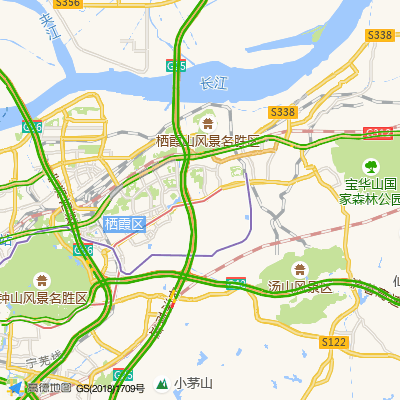

In [20]:
from PIL import Image
from io import BytesIO
def map(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = "https://restapi.amap.com/v3/staticmap?parameters"
    params = {
        "key":my_key,
        "location":location,
        "zoom":zoom,
        "size":size,
        "scale":scale,
        "markers":markers,
        "labels":labels,
        "paths":paths,
        "traffic":traffic,
        "sig":sig,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
map(location=南京大学地理编码,zoom=10,traffic=1)

## 8. 坐标转换
思考：我觉得用到了数论与代数算法、数值分析算法。用户可根据自己的需要调用该接口，进行坐标的转换（输入的坐标需为非高德坐标，如GPS坐标、baidu坐标，将其转换成高的坐标）。

In [21]:
def change(locations,coordsys,sig=None)->dict:
    url = "https://restapi.amap.com/v3/assistant/coordinate/convert?parameters"
    params = {
        "key":my_key,
        "locations":locations,
        "coordsys":coordsys,
        "sig":sig,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

change(locations="118.961365,32.110012|118.798150,32.046546",coordsys="gps")

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '118.966488444011,32.10785780165;118.803330349393,32.044471571181'}

## 9. 天气查询
思考：我觉得用到了搜索算法、数值分析算法。用户可根据自己的需要调用该接口，输入城市编码进行查询实时/未来天气状况。

In [96]:
df = pd.read_excel("AMap_adcode_citycode_2020_4_10.xlsx")
编码字典=df.reset_index().set_index("中文名")["adcode"].to_dict()

def weather(city,extensions)->dict:
    url = "https://restapi.amap.com/v3/weather/weatherInfo?parameters"
    params = {
        "key":my_key,
        "city":编码字典[city],
        "extensions":extensions,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
天气预报 = weather(city=input("输入城市/地区名称："),extensions="all")

df_天气预报 = json_normalize(实时天气["forecasts"][0]["casts"])
display(df_天气预报)

输入城市/地区名称：杭州市


,date,daypower,daytemp,dayweather,daywind,nightpower,nighttemp,nightweather,nightwind,week
0,2020-04-22,4,20,多云,北,4,8,多云,北,3
1,2020-04-23,4,18,多云,西,4,7,晴,西,4
2,2020-04-24,≤3,21,晴,西南,≤3,11,晴,西南,5
3,2020-04-25,≤3,26,晴,西,≤3,14,多云,西,6


## 10. 输入提示
思考：我觉得用到了推荐算法、检索算法、动态分析算法以及GPS定位功能。

In [34]:
def words(keywords,location,city,citylimit=True,datatype="all",sig=None)->dict:
    url = "https://restapi.amap.com/v3/assistant/inputtips?parameters"
    params = {
        "key":my_key,
        "keywords":keywords,
        "types":"050301",
        "location":location,
        "city":city,
        "citylimit":citylimit,
        "datatype":datatype,
        "sig":sig,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
input_for_search = json_normalize(words(keywords=input("输入关键字:"),location=南京大学地理编码,city="南京")["tips"])
input_for_search[["address","district","name","location"]]

输入关键字:海底捞


,address,district,name,location
0,九霄梦天地,江苏省南京市栖霞区,海底捞火锅(仙林大学城店),"118.917405,32.092174"
1,红山路88号常发广场1号楼5层,江苏省南京市玄武区,海底捞火锅(红山路店),"118.810133,32.084997"
2,龙蟠路230附近,江苏省南京市鼓楼区,海底捞火锅,"118.781281,32.090606"
3,建宁路8号玉桥商业广场B座4层004室,江苏省南京市鼓楼区,海底捞火锅(玉桥广场店),"118.780717,32.091734"
4,北京东路1号环亚凯瑟琳广场2层,江苏省南京市玄武区,海底捞火锅(北京东路店),"118.789662,32.058892"
5,中山东路288之2-3号新世纪广场A幢4层,江苏省南京市秦淮区,海底捞火锅(新世纪广场),"118.795200,32.040009"
6,珠江路88号新世界百货5层,江苏省南京市玄武区,海底捞火锅(新世界百货店),"118.788704,32.049413"
7,中山南路1号新百A座8层,江苏省南京市秦淮区,海底捞火锅(新街口新百店),"118.784769,32.041054"
8,中山北路105号中环国际广场4层,江苏省南京市鼓楼区,海底捞火锅(中环国际广场店),"118.772715,32.066642"
9,健康路2号茂业天地6层,江苏省南京市秦淮区,海底捞火锅(夫子庙店),"118.785649,32.022466"


## 11. 交通态势
思考：我觉得用到了动态规划算法、动态分析算法、检索算法、GPS功能、关联规则算法、计算机视觉。

In [35]:
# 圆形区域交通态势
def traffic(location,radius,level,extensions="all",sig=None)->dict:
    url = "https://restapi.amap.com/v3/traffic/status/circle?parameters"
    params = {
     "key":my_key,
     "location":location,
     "radius":radius,
     "level":level,
     "extensions":extensions,
     "sig":sig,
     "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

df_traffic = json_normalize(traffic(location="113.327343,23.119274",radius=5000,level=5)["trafficinfo"])
df_traffic


,description,evaluation.blocked,evaluation.congested,evaluation.description,evaluation.expedite,evaluation.status,evaluation.unknown,roads
0,华夏路：从金穗路到黄埔大道西行驶缓慢；华明路：富力君悦大酒店附近自东向西行驶缓慢。,0.00%,10.20%,轻度拥堵,87.76%,2,2.04%,"[{'name': '华夏路', 'status': '2', 'direction': '..."


In [36]:
df_traffic_roads = pd.DataFrame(df_traffic["roads"][0])
df_traffic_roads[["angle","direction","name","speed","status"]]

,angle,direction,name,speed,status
0,84,从金穗路到黄埔大道西,华夏路,20,2
1,176,从华夏路到华穗路,金穗路,20,2
2,89,从金穗路到黄埔大道西,华穗路,25,2
3,349,从华穗路到珠江西路,华成路,10,2
4,179,从珠江西路到华夏路,华明路,10,2
5,357,从广州大桥到琶洲大桥,临江大道,50,1
6,175,从琶洲大桥到广州大桥,临江大道,45,1
7,175,从潭村路到冼村路,花城大道,40,1
8,90,从猎德大桥到天河东路,猎德大道,50,1
9,270,从天河东路到猎德大桥,猎德大道,50,1


## 12. 地理围栏
思考：地理围栏是LBS的一种应用，就是用一个虚拟的栅栏围出一个虚拟的地理边界。假如我们在商场上建一个围栏，只要有用户进入了这个区域，手机便会收到优惠卷的消息。我觉得在两个省的边界处能收到“欢迎来到xx省”也是利用地理围栏做到的。地理围栏还挺复杂的，我觉得用到的算法有计算几何的算法、图论的算法、动态规划算法。

In [39]:
# 创建围栏 post
def create(url)->dict:
    url = "https://restapi.amap.com/v4/geofence/meta?key="+my_key
    params = {
        "name": "测试围栏",
        "center": "118.917405,32.092174",
        "radius": "1000",
        "enable": "true",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave",
        "valid_time":"2020-09-03"
    }
    response = requests.post(url,json=params)
    data = response.json()
    return data
create("url")  # 创建圆形围栏，并返回围栏id

{'data': {'gid': '95a6fc38-cc8c-436f-9021-2423dbab50c0',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [44]:
# 查询围栏 get
def search(key):
    url = "https://restapi.amap.com/v4/geofence/meta?key="+my_key
    params = {
      'key':my_key,
      'gid':'95a6fc38-cc8c-436f-9021-2423dbab50c0'
      }
    response = requests.get(url, params)
    answer = response.json()
    return answer
df_serach = json_normalize(search("key")["data"]["rs_list"][0]).T
df_serach

,0
adcode,0
alert_condition,enter;leave
center,"118.917405,32.092174"
create_time,2020-04-22 13:41:26
enable,True
fixed_date,
gid,95a6fc38-cc8c-436f-9021-2423dbab50c0
id,0
key,04a0f2c511ae63fee5e2b5da9e60417e
name,测试围栏


In [58]:
# 更新围栏 patch
import requests
import json
def new(url):
    url = "https://restapi.amap.com/v4/geofence/meta?key="+my_key+"&gid=95a6fc38-cc8c-436f-9021-2423dbab50c0"
    params = {
        "name":"更新我的围栏",
        "center":"118.795200,32.040009",
        "radius":"1200",
        "valid_time":"2020-08-30",
        "repeat":"Mon,Wed,Fri,Sat,Sun",
        "time":"08:00,14:30;20:00,23:00",
        "desc":"更新围栏描述",
        "alert_condition":"enter"
    }
    params = json.dumps(params)
    response = requests.patch(url,data=params)
    data = response.json()
    return data
new("url")

{'data': {'message': '成功', 'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 13. 轨迹纠偏
思考：地图是通过GPS来实现定位的，但是却很容易受天气以及建筑物密集的影响。轨迹纠偏主要是让计算机来识别并精确匹配到道路上，我觉得用到了计算几何的算法、纠偏算法、轨迹匹配算法、Viterbi算法、隐式马尔科夫模型、计算机视觉。

In [86]:
import json
def grasproad(key)->dict:
    url = "https://restapi.amap.com/v4/grasproad/driving?key="+my_key
    body = [{
        "x": 116.449429,
        "y": 40.014844,
        "sp": 4,
        "ag": 110,
        "tm": 1478831753
        }, {
        "x": 116.449639,
        "y": 40.014776,
        "sp": 3,
        "ag": 110,
        "tm": 23
        }, {
        "x": 116.449859,
        "y": 40.014716,
        "sp": 3,
        "ag": 111,
        "tm": 33
        }, {
        "x": 116.450074,
        "y": 40.014658,
        "sp": 3,
        "ag": 110,
        "tm": 31
        }, {
        "x": 116.450273,
        "y": 40.014598,
        "sp": 3,
        "ag": 111,
        "tm": 20
    }]
    response = requests.post(url,data=json.dumps(body))
    data = response.json()
    return data
grasproad("key")

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 尝试设计一款简单应用，至少涉及3个API功能
   我想设计一款分享类应用，人们可以在上面分享自己拍的照片（不是大头自拍照，而是风景照或者适合拍照的地方）。如果是摄影师，则可以分享自己所拍的景点照等等，应用会自动识别这是哪里（粗略识别），并且会显示该位置的天气情况以及附近的场所信息，当然还可以提供路况给用户。如果用户想去某个景点拍照游玩，便可通过我们的应用去根据自身情况决定要不要去拍。我所采用的API功能有：   
   * Azure的python域模型，进行识别图中的景点位于哪里
   * 调用高德地图的地理编码接口，识别该具体位置
   * 高德地图的天气查询
   * 高德地图的搜索POI接口，进行查询地址附近的信息
   * 高德地图的交通态势接口，将实时路况反馈给用户
   * 高德地图的路径规划，为用户提供出行路线